# Project Description:
This model uses Binary Classification to classify whether patient has diabetes.

The model takes in patient medical data in the form of eight parameters as input, and predicts the percent probability of the patient having diabetes.

- Data Processing operations are done using Pandas

- Feature Scaling is done using StandardScaler (sklearn)

- Keras is used for model building and training.


The dataset can be found [here](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset).


# 1. Import Sequences

In [1]:
# Import Sequences

# Import for working with dates and times
from datetime import datetime

# Import for numerical computations and data manipulation
import numpy as np

# Import for data analysis and manipulation
import pandas as pd

# Import for creating plots and visualizations
import matplotlib.pyplot as plt

# Import for resampling data for machine learning
from sklearn.utils import resample

# Import for calculating confusion matrices for evaluating models
from sklearn.metrics import confusion_matrix

# Import for standardizing or scaling feature data
from sklearn.preprocessing import StandardScaler

# Import for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import for early stopping during neural network training
from keras.callbacks import EarlyStopping

# Imports for building neural network layers and models
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential


# Defining Constants / Variables

# CSV variable for CSV file
CSV = '/content/diabetes_dataset.csv'

# 2. Data Processing and Dataset Creation

In [2]:
# Creating dataframe of CSV data
diabetesData = pd.read_csv(CSV)

# Displaying the dataframe
diabetesData


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# Data cleaning

# Replacing all Females with 1
diabetesData['gender'] = diabetesData['gender'].replace('Female', 1)

# Replacing all Males with 2
diabetesData['gender'] = diabetesData['gender'].replace('Male', 2)

# Replacing all Others with 3
diabetesData['gender'] = diabetesData['gender'].replace('Other', 3)


# Replacing smoking_history values with 0-5
diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('No Info', 0)

diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('never', 1)

diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('ever', 2)

diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('former', 3)

diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('not current', 4)

diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('current', 5)



In [4]:
# Display the dataset
diabetesData

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,2,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,5,23.45,5.0,155,0
4,2,76.0,1,1,5,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,0,27.32,6.2,90,0
99996,1,2.0,0,0,0,17.37,6.5,100,0
99997,2,66.0,0,0,3,27.83,5.7,155,0
99998,1,24.0,0,0,1,35.42,4.0,100,0


In [5]:
# The dataset contains few records of +ve diabetes, so it is important to balance and shuffle the dataset.
# By resampling the data, we ensure that the model does not become biased.


def balance_diabetes_data(df):
    '''
    Function to that returns a resampled dataset containing equal amount of positive and negative
    records.

    Inputs:
    df:   The dataset to be resampled.

    Returns:
    balanced_df:   The resampled dataset.

    '''

    # Separate records with diabetes and without diabetes
    diabetes_positive = df[df['diabetes'] == 1]
    diabetes_negative = df[df['diabetes'] == 0]

    # Downsample the majority class (diabetes-negative) to match the minority class (diabetes-positive)
    diabetes_negative_downsampled = resample(diabetes_negative,
                                             replace=False,                     # Without replacement
                                             n_samples=len(diabetes_positive),  # Match minority class size
                                             random_state=42)                   # For reproducibility

    # Combine the balanced classes
    balanced_df = pd.concat([diabetes_positive, diabetes_negative_downsampled])
    balanced_df = balanced_df.sample(frac=1, random_state=42)

    return balanced_df



In [6]:
# Call the function to balance the dataset
diabetesData = balance_diabetes_data(diabetesData)

# 3. Feature Scaling and Splitting into Train/Test Sets

In [7]:
# Splitting the dataset into Features and Target
features = diabetesData[['gender','age','hypertension','heart_disease', 'smoking_history',	'bmi',	'HbA1c_level',	'blood_glucose_level']]
target = diabetesData['diabetes']


In [8]:
# Defining the Scaler
scaler = StandardScaler()

# Scaling the features
x_features = scaler.fit_transform(features.values)

# Re-assign scaled values to Features
features = pd.DataFrame(columns=features.columns, data=x_features, index=features.index)

In [9]:
# Display the features
features

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
17328,-0.889478,-1.103349,-0.422504,-0.311199,-1.013705,-0.746316,-0.906506,-0.056848
60483,-0.889478,0.761770,-0.422504,-0.311199,-0.403342,0.068001,0.028206,-0.074400
46998,-0.889478,-1.849397,-0.422504,-0.311199,1.427747,-1.483529,0.339777,-1.461038
26328,1.123183,-0.450557,-0.422504,-0.311199,-0.403342,1.037876,2.053416,0.996295
74525,-0.889478,0.108979,-0.422504,-0.311199,-0.403342,2.092971,0.495562,2.400485
...,...,...,...,...,...,...,...,...
52499,-0.889478,0.668515,-0.422504,-0.311199,-0.403342,-1.070960,-2.074896,-0.074400
37951,-0.889478,0.155607,-0.422504,-0.311199,-0.403342,-0.493363,-0.906506,-1.461038
62129,-0.889478,0.435375,-0.422504,-0.311199,-0.403342,1.332761,0.261884,-0.144610
10023,-0.889478,0.435375,-0.422504,-0.311199,-1.013705,-1.557927,1.586060,-0.653629


In [10]:
# Define the percent split between train and test data
train_split = 0.8
split_index = int(np.ceil(len(features)*train_split))

In [11]:
# Splitting Features and Target into Train and Test sets
x_train , x_test = features[:split_index] , features[split_index:]
y_train , y_test = target[:split_index] , target[split_index:]

# Print the shapes of the subsets
print(features.shape , x_train.shape , x_test.shape , y_test.shape)

(17000, 8) (13600, 8) (3400, 8) (3400,)


# 4. Building the Model

In [12]:
# Define the various properties

# Optimizer for training the neural network
OPTIMIZER = 'adam'

# Loss function for the neural network
LOSS = 'binary_crossentropy'

# Metrics to evaluate model performance
METRICS = ['accuracy']

# Number of training epochs
EPOCHS = 100

# Batch size for training data
BATCH_SIZE = 4

# Fraction of data used for validation during training
V_SPLIT = 0.2

# Defining Early Stopping monitor
early_stopping_monitor = EarlyStopping(patience = 30)

In [13]:
# Designing the classifier model

# Create a Sequential Model
diabetesModel = Sequential()

# Adding a Dense (Fully Connected) layer with 8 input units, ReLu activation and input shape defined by feature set.
diabetesModel.add(Dense(8, activation = 'relu', input_shape = (x_train.shape[1],)))

# Adding another Dense Layer with 32 units
diabetesModel.add(Dense(32, activation='relu'))

# BatchNormalization is used to normalize the activations of prev. layer
diabetesModel.add(BatchNormalization())

# Dropout layers randomly drop set percent of units to prevent overfitting.
# Dropout rate is defined as 0.2 , which is 20%
diabetesModel.add(Dropout(0.2))

# Repeating the above
diabetesModel.add(Dense(32, activation='relu'))
diabetesModel.add(BatchNormalization())
diabetesModel.add(Dropout(0.2))

diabetesModel.add(Dense(16, activation='relu'))

# Adding a Dense Output layer with 1 unit and Sigmoid activation function for Binary Classification
diabetesModel.add(Dense(1, activation = 'sigmoid'))

# Print the model layer summary
diabetesModel.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [14]:
# Compile the model
diabetesModel.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

# 5. Training the Model and Plotting Losses

In [15]:
# Train the model for specified Epochs and store training history data
history = diabetesModel.fit(x_train, y_train.values, shuffle = True, validation_split=V_SPLIT, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping_monitor]  )

Epoch 1/100
2720/2720 [==============================] - 14s 4ms/step - loss: 0.4746 - accuracy: 0.7812 - val_loss: 0.3188 - val_accuracy: 0.8684
Epoch 2/100
2720/2720 [==============================] - 7s 3ms/step - loss: 0.3745 - accuracy: 0.8357 - val_loss: 0.2818 - val_accuracy: 0.8669
Epoch 3/100
2720/2720 [==============================] - 8s 3ms/step - loss: 0.3385 - accuracy: 0.8507 - val_loss: 0.2699 - val_accuracy: 0.8776
Epoch 4/100
2720/2720 [==============================] - 8s 3ms/step - loss: 0.3207 - accuracy: 0.8559 - val_loss: 0.2680 - val_accuracy: 0.8687
Epoch 5/100
2720/2720 [==============================] - 7s 3ms/step - loss: 0.3089 - accuracy: 0.8632 - val_loss: 0.2545 - val_accuracy: 0.8713
Epoch 6/100
2720/2720 [==============================] - 8s 3ms/step - loss: 0.2937 - accuracy: 0.8722 - val_loss: 0.2599 - val_accuracy: 0.8691
Epoch 7/100
2720/2720 [==============================] - 7s 3ms/step - loss: 0.2944 - accuracy: 0.8667 - val_loss: 0.2580 - val_a

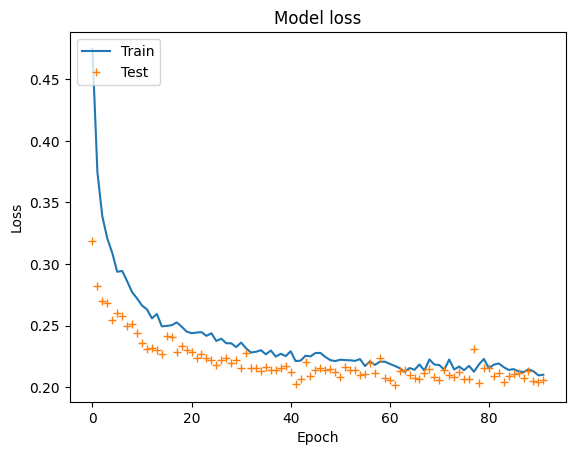

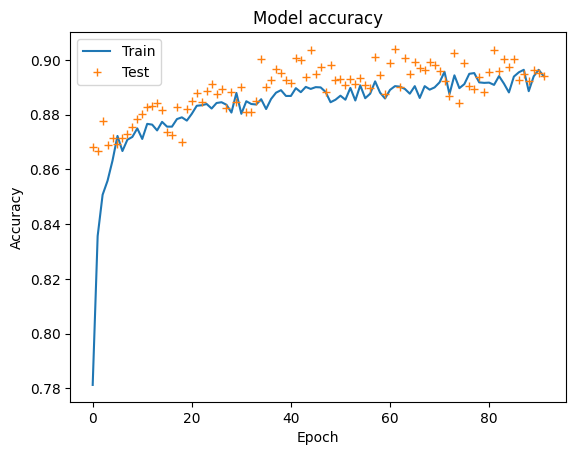

In [16]:
# Plot the Training Losses vs. Validation Losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'+')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print()

# Plot the Training Accuracy vs. Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'+')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 6. Testing the Model and Measuring Performance

In [17]:
# Get the losses and accuracy of model for test data using .evaluate()
loss , acc = diabetesModel.evaluate(x_test, y_test)

107/107 [==============================] - 1s 2ms/step - loss: 0.1967 - accuracy: 0.9021


In [18]:
# Obtain Predictions for Test data
y_pred = diabetesModel.predict(x_test)

# Reduce the dimensions of y_pred array
y_pred=y_pred.squeeze()

# Display the predictions
y_pred

107/107 [==============================] - 0s 2ms/step


array([1.0000000e+00, 2.5054270e-01, 3.2939238e-07, ..., 7.2803938e-01,
       9.9999833e-01, 1.0687037e-05], dtype=float32)

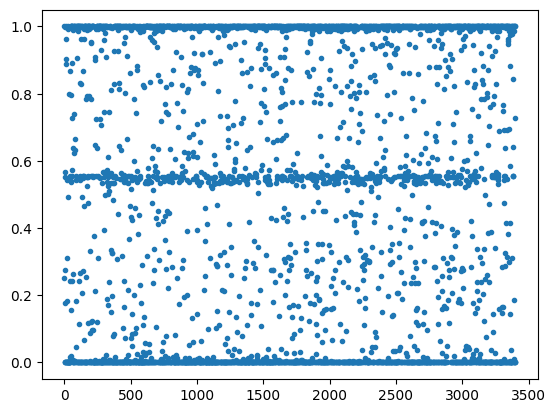

In [19]:
# Plot the predictions
plt.plot(y_pred,'.')

In [20]:
# Convert predicted probabilities to classes (0 or 1) based on a threshold
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix of model
conf_matrix = confusion_matrix(y_test.values, y_pred_classes)

# Display the matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1475  265]
 [  68 1592]]


In [27]:
# Obtaining the values from Confusion Matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision (Positive Predictive Value)
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity, True Positive Rate)
recall = TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the data
print("True Positives:  ", TP)
print("False Positives: ", FP)
print("True Negatives:  ", TN)
print("False Negatives: ", FN)

print("______________________\n")

print("Accuracy:  ", accuracy)
print("Precision: ", precision)
print("Recall:  ", recall)
print("Specificity: ", specificity)
print("F1-Score:  ", f1_score)

True Positives:   1592
False Positives:  265
True Negatives:   1475
False Negatives:  68
______________________

Accuracy:   0.9020588235294118
Precision:  0.8572967151319332
Recall:   0.9590361445783132
Specificity:  0.8477011494252874
F1-Score:   0.9053170315609894


# 7. Exporting the Model (Optional)

In [22]:
# Obtain the current date and time
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Define model file name:
model_filename= f"diabetesModel_{timestamp}.h5"

# Save the model
diabetesModel.save(model_filename)

